In [1]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split


import requests, string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import emoji

In [2]:
veri=sqlite3.connect("veri.db")

In [3]:
cursor=veri.cursor()

In [4]:
cursor.execute("SELECT*FROM tweets LIMIT 10")

In [5]:
veriler= cursor.fetchall()

In [6]:
veriler

[('1349073213356187650',
  'Bu son #Survivor #SurvivorPanaroma #survivorekstra #survivor2021 #yiğem #WatsAPPsiliyoruz #WhatsappNewPolicy #WatsAPPsilmiyoruz #fener  #Survivor2021 #yiğem https://t.co/KOuThplr43',
  '2021-01-12 19:18:13'),
 ('1349072961387552769',
  'Gece 12 ye kdr takip edip twitlerimi beğenen herkesin 10 twitini beğenip gt yapıyorum.. \n#gtvar #WatsAPPsiliyoruz #gtgrubu',
  '2021-01-12 19:17:13'),
 ('1349072690381000704',
  'İzleyelim \n#Survivor #SurvivorPanaroma #survivorekstra #survivor2021 #yiğem #WatsAPPsiliyoruz #WhatsappNewPolicy #WatsAPPsilmiyoruz #fener  #Survivor2021 #yiğem\n  https://t.co/5CndQSCeIa',
  '2021-01-12 19:16:08'),
 ('1349072293893435392',
  '#WatsAPPsiliyoruz TELEGRAM WEB NASIL KULLANILIR??? İŞTE CEVABI https://t.co/Get0edgqS6',
  '2021-01-12 19:14:34'),
 ('1349071802383949827',
  '#WatsAPPsiliyoruz  bir karar al be https://t.co/CP1zi32BBB',
  '2021-01-12 19:12:36'),
 ('1349068216677650435',
  'İzleyin\n#Survivor #SurvivorPanaroma #survivorekstra

In [7]:
df = pd.read_sql_query("SELECT * FROM tweets", veri)
df

,id,text,tarih
0,1349073213356187650,Bu son #Survivor #SurvivorPanaroma #survivorek...,2021-01-12 19:18:13
1,1349072961387552769,Gece 12 ye kdr takip edip twitlerimi beğenen h...,2021-01-12 19:17:13
2,1349072690381000704,İzleyelim \n#Survivor #SurvivorPanaroma #survi...,2021-01-12 19:16:08
3,1349072293893435392,#WatsAPPsiliyoruz TELEGRAM WEB NASIL KULLANILI...,2021-01-12 19:14:34
4,1349071802383949827,#WatsAPPsiliyoruz bir karar al be https://t.c...,2021-01-12 19:12:36
...,...,...,...
9295,1349083487115087872,Şimdi whatsapp düşünsün 🤓\n#WhatsApp\n#WatsAPP...,2021-01-12 19:59:02
9296,1349082829355933696,Efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:56:25
9297,1349082589143986177,Efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:55:28
9298,1349082306326228993,Watsapp daha güvenilir diye kendi telefonundan...,2021-01-12 19:54:21


In [8]:
df.to_csv("twitter.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9300 non-null   object
 1   text    9300 non-null   object
 2   tarih   9300 non-null   object
dtypes: object(3)
memory usage: 218.1+ KB


In [10]:
df.head()

,id,text,tarih
0,1349073213356187650,Bu son #Survivor #SurvivorPanaroma #survivorek...,2021-01-12 19:18:13
1,1349072961387552769,Gece 12 ye kdr takip edip twitlerimi beğenen h...,2021-01-12 19:17:13
2,1349072690381000704,İzleyelim \n#Survivor #SurvivorPanaroma #survi...,2021-01-12 19:16:08
3,1349072293893435392,#WatsAPPsiliyoruz TELEGRAM WEB NASIL KULLANILI...,2021-01-12 19:14:34
4,1349071802383949827,#WatsAPPsiliyoruz bir karar al be https://t.c...,2021-01-12 19:12:36


In [11]:
df.tail()

,id,text,tarih
9295,1349083487115087872,Şimdi whatsapp düşünsün 🤓\n#WhatsApp\n#WatsAPP...,2021-01-12 19:59:02
9296,1349082829355933696,Efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:56:25
9297,1349082589143986177,Efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:55:28
9298,1349082306326228993,Watsapp daha güvenilir diye kendi telefonundan...,2021-01-12 19:54:21
9299,1349080281463083010,Anlık watsapp: Sizin mesajları attığınız kişi ...,2021-01-12 19:46:18


In [12]:
def cleantxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'\n','',text)
    text=re.sub(r'[0-9]','',text)
    text=re.sub(r'https?:\/\/+','',text)
    text=re.sub(emoji.get_emoji_regexp(),r"",text)

    
    return text
    


    

In [13]:
df['text']=df['text'].apply(cleantxt)

In [14]:
df

,id,text,tarih
0,1349073213356187650,Bu son Survivor SurvivorPanaroma survivorekstr...,2021-01-12 19:18:13
1,1349072961387552769,Gece ye kdr takip edip twitlerimi beğenen her...,2021-01-12 19:17:13
2,1349072690381000704,İzleyelim Survivor SurvivorPanaroma survivorek...,2021-01-12 19:16:08
3,1349072293893435392,WatsAPPsiliyoruz TELEGRAM WEB NASIL KULLANILIR...,2021-01-12 19:14:34
4,1349071802383949827,WatsAPPsiliyoruz bir karar al be t.co/CPziBBB,2021-01-12 19:12:36
...,...,...,...
9295,1349083487115087872,Şimdi whatsapp düşünsün WhatsAppWatsAPPsiliyor...,2021-01-12 19:59:02
9296,1349082829355933696,Efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:56:25
9297,1349082589143986177,Efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:55:28
9298,1349082306326228993,Watsapp daha güvenilir diye kendi telefonundan...,2021-01-12 19:54:21


In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    
    return text

In [17]:
df['text']=df['text'].apply(lambda x: remove_punct(x))

In [18]:
df

,id,text,tarih
0,1349073213356187650,Bu son Survivor SurvivorPanaroma survivorekstr...,2021-01-12 19:18:13
1,1349072961387552769,Gece ye kdr takip edip twitlerimi beğenen her...,2021-01-12 19:17:13
2,1349072690381000704,İzleyelim Survivor SurvivorPanaroma survivorek...,2021-01-12 19:16:08
3,1349072293893435392,WatsAPPsiliyoruz TELEGRAM WEB NASIL KULLANILIR...,2021-01-12 19:14:34
4,1349071802383949827,WatsAPPsiliyoruz bir karar al be tcoCPziBBB,2021-01-12 19:12:36
...,...,...,...
9295,1349083487115087872,Şimdi whatsapp düşünsün WhatsAppWatsAPPsiliyor...,2021-01-12 19:59:02
9296,1349082829355933696,Efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:56:25
9297,1349082589143986177,Efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:55:28
9298,1349082306326228993,Watsapp daha güvenilir diye kendi telefonundan...,2021-01-12 19:54:21


In [19]:
def remove_uppercase(text):
    text_lowercase = ' '.join(x.lower() for x in text.split())# It will discard all uppercases
    return text_lowercase

In [20]:
df['text'] = df['text'].apply(lambda x: remove_uppercase(x)) 

In [21]:
df

,id,text,tarih
0,1349073213356187650,bu son survivor survivorpanaroma survivorekstr...,2021-01-12 19:18:13
1,1349072961387552769,gece ye kdr takip edip twitlerimi beğenen herk...,2021-01-12 19:17:13
2,1349072690381000704,i̇zleyelim survivor survivorpanaroma survivore...,2021-01-12 19:16:08
3,1349072293893435392,watsappsiliyoruz telegram web nasil kullanilir...,2021-01-12 19:14:34
4,1349071802383949827,watsappsiliyoruz bir karar al be tcocpzibbb,2021-01-12 19:12:36
...,...,...,...
9295,1349083487115087872,şimdi whatsapp düşünsün whatsappwatsappsiliyor...,2021-01-12 19:59:02
9296,1349082829355933696,efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:56:25
9297,1349082589143986177,efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:55:28
9298,1349082306326228993,watsapp daha güvenilir diye kendi telefonundan...,2021-01-12 19:54:21


In [22]:
df['text']
    

0       bu son survivor survivorpanaroma survivorekstr...
1       gece ye kdr takip edip twitlerimi beğenen herk...
2       i̇zleyelim survivor survivorpanaroma survivore...
3       watsappsiliyoruz telegram web nasil kullanilir...
4             watsappsiliyoruz bir karar al be tcocpzibbb
                              ...                        
9295    şimdi whatsapp düşünsün whatsappwatsappsiliyor...
9296    efendi ol watsap efendi bak yüzüklerin efendis...
9297    efendi ol watsap efendi bak yüzüklerin efendis...
9298    watsapp daha güvenilir diye kendi telefonundan...
9299    anlık watsapp sizin mesajları attığınız kişi b...
Name: text, Length: 9300, dtype: object

In [23]:
df.to_csv("tweet.csv")

In [24]:
da=pd.read_csv("tweet.csv")

In [25]:
da

,Unnamed: 0,id,text,tarih
0,0,1349073213356187650,bu son survivor survivorpanaroma survivorekstr...,2021-01-12 19:18:13
1,1,1349072961387552769,gece ye kdr takip edip twitlerimi beğenen herk...,2021-01-12 19:17:13
2,2,1349072690381000704,i̇zleyelim survivor survivorpanaroma survivore...,2021-01-12 19:16:08
3,3,1349072293893435392,watsappsiliyoruz telegram web nasil kullanilir...,2021-01-12 19:14:34
4,4,1349071802383949827,watsappsiliyoruz bir karar al be tcocpzibbb,2021-01-12 19:12:36
...,...,...,...,...
9295,9295,1349083487115087872,şimdi whatsapp düşünsün whatsappwatsappsiliyor...,2021-01-12 19:59:02
9296,9296,1349082829355933696,efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:56:25
9297,9297,1349082589143986177,efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:55:28
9298,9298,1349082306326228993,watsapp daha güvenilir diye kendi telefonundan...,2021-01-12 19:54:21


In [26]:
da.drop('Unnamed: 0',axis=1, inplace=True)

In [27]:
da

,id,text,tarih
0,1349073213356187650,bu son survivor survivorpanaroma survivorekstr...,2021-01-12 19:18:13
1,1349072961387552769,gece ye kdr takip edip twitlerimi beğenen herk...,2021-01-12 19:17:13
2,1349072690381000704,i̇zleyelim survivor survivorpanaroma survivore...,2021-01-12 19:16:08
3,1349072293893435392,watsappsiliyoruz telegram web nasil kullanilir...,2021-01-12 19:14:34
4,1349071802383949827,watsappsiliyoruz bir karar al be tcocpzibbb,2021-01-12 19:12:36
...,...,...,...
9295,1349083487115087872,şimdi whatsapp düşünsün whatsappwatsappsiliyor...,2021-01-12 19:59:02
9296,1349082829355933696,efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:56:25
9297,1349082589143986177,efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:55:28
9298,1349082306326228993,watsapp daha güvenilir diye kendi telefonundan...,2021-01-12 19:54:21


In [37]:
da=pd.read_csv("tweet.csv")

In [38]:
da

,id,text,tarih,duygu
0,1349073213356187650,bu son survivor survivorpanaroma survivorekstr...,2021-01-12 19:18:13,pozitif
1,1349072961387552769,gece ye kdr takip edip twitlerimi beğenen herk...,2021-01-12 19:17:13,pozitif
2,1349072690381000704,i̇zleyelim survivor survivorpanaroma survivore...,2021-01-12 19:16:08,negatif
3,1349072293893435392,watsappsiliyoruz telegram web nasil kullanilir...,2021-01-12 19:14:34,nötr
4,1349071802383949827,watsappsiliyoruz bir karar al be tcocpzibbb,2021-01-12 19:12:36,negatif
...,...,...,...,...
9295,1349083487115087872,şimdi whatsapp düşünsün whatsappwatsappsiliyor...,2021-01-12 19:59:02,negatif
9296,1349082829355933696,efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:56:25,nötr
9297,1349082589143986177,efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:55:28,pozitif
9298,1349082306326228993,watsapp daha güvenilir diye kendi telefonundan...,2021-01-12 19:54:21,negatif


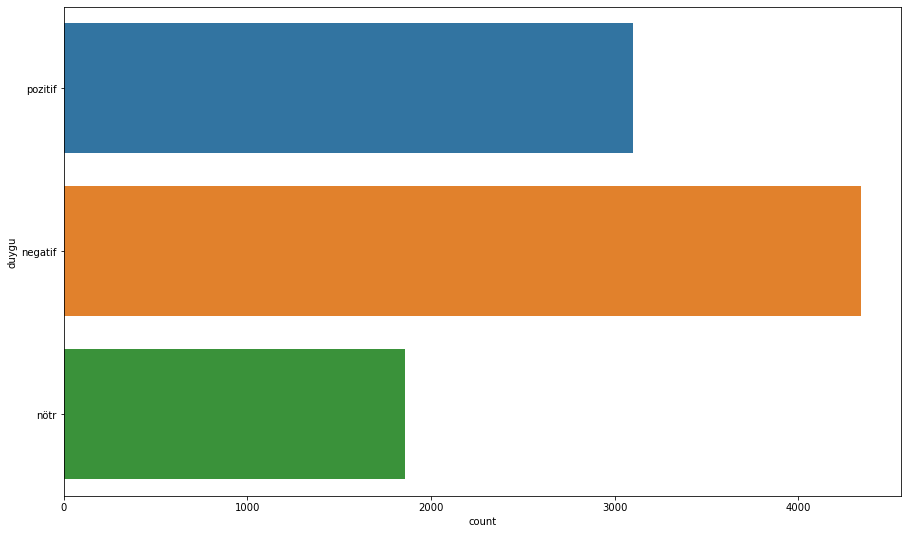

In [39]:
plt.figure(figsize=(15,9))
sns.countplot(y = 'duygu', data=da)

In [43]:
da.isnull().sum()

id       0
text     0
tarih    0
duygu    0
dtype: int64

In [45]:
da.duygu.value_counts()


negatif    4340
pozitif    3100
nötr       1860
Name: duygu, dtype: int64

In [56]:
a=sum(da["duygu"]=="negatif")/da.duygu.shape[0]*100
print(f"negatif oranı % : {a}")

negatif oranı % : 46.666666666666664


In [57]:
b=sum(da["duygu"]=="pozitif")/da.duygu.shape[0]*100
print(f"pozitif oranı % : {b}")

pozitif oranı % : 33.33333333333333


In [58]:
c=sum(da["duygu"]=="nötr")/da.duygu.shape[0]*100
print(f"negatif oranı % : {c}")

negatif oranı % : 20.0


In [79]:
da.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9300 entries, 0 to 9299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9300 non-null   int64 
 1   text    9300 non-null   object
 2   tarih   9300 non-null   object
 3   duygu   9300 non-null   object
dtypes: int64(1), object(3)
memory usage: 683.3+ KB


In [64]:
train, test = train_test_split(da, test_size=0.2)

In [67]:
train.to_csv("train.csv")

In [68]:
test.to_csv("test.csv")

In [83]:
dt=pd.read_csv("train.csv")

In [84]:
dt

,id,text,tarih,duygu
432,1349089662363705344,survivor survivorpanaroma survivorekstra survi...,2021-01-12 20:23:35,pozitif
1749,1349066808242876418,whatsapp gülüm sen inat edince orada bir uzakl...,2021-01-12 18:52:46,negatif
9199,1349080281463083010,anlık watsapp sizin mesajları attığınız kişi b...,2021-01-12 19:46:18,negatif
9200,1350160059368660993,abi bu kardeşimize yardım edebilir miyizwatsap...,2021-01-15 19:16:57,negatif
5168,1349057486620405760,abi bu kardeşimize yardım edebilir miyizwatsap...,2021-01-12 18:15:43,pozitif
...,...,...,...,...
4146,1349080281463083010,anlık watsapp sizin mesajları attığınız kişi b...,2021-01-12 19:46:18,nötr
6551,1349093767274487814,sipariş ve daha fazla ürün için hemen tcornvln...,2021-01-12 20:39:53,nötr
6902,1349406484627673088,bipe gelenlere selam veriyorumdur bip watsapps...,2021-01-13 17:22:31,negatif
4822,1349147109505851401,mor halkalılar için yeni halka fikri d whatsap...,2021-01-13 00:11:51,pozitif


In [73]:
#dt.drop('Unnamed: 0',axis=1, inplace=True)

In [85]:
ds=pd.read_csv("test.csv")
ds

,id,text,tarih,duygu
5621,1349189035047182339,whatsapp yıkık mesajları paylaşan yıkılmış bit...,2021-01-13 02:58:27,nötr
4366,1349056735097585666,kadro açılmasını talep ediyoruz engelli yerel ...,2021-01-12 18:12:44,pozitif
8670,1349098261601259530,survivor survivorpanaroma survivorekstra survi...,2021-01-12 20:57:45,pozitif
1437,1349083487115087872,şimdi whatsapp düşünsün whatsappwatsappsiliyor...,2021-01-12 19:59:02,pozitif
5603,1349346343379206145,i̇zleniyoruz uyanın artık watsappsiliyoruz ins...,2021-01-13 13:23:32,pozitif
...,...,...,...,...
8787,1349073213356187650,bu son survivor survivorpanaroma survivorekstr...,2021-01-12 19:18:13,pozitif
1702,1349265243822821378,watsap kaldi̇mi̇ sap bende si̇ldi̇m gerek yok ...,2021-01-13 08:01:16,pozitif
8177,1349090440952356874,o diyil de olan çöpçü gibi topladığım stickerl...,2021-01-12 20:26:40,negatif
1128,1349095821405523971,watsappsiliyoruz si̇lmesi̇ne de beni̇m arkadaş...,2021-01-12 20:48:03,nötr


In [77]:
#ds.drop('Unnamed: 0',axis=1, inplace=True)